### Exercícios PySpark

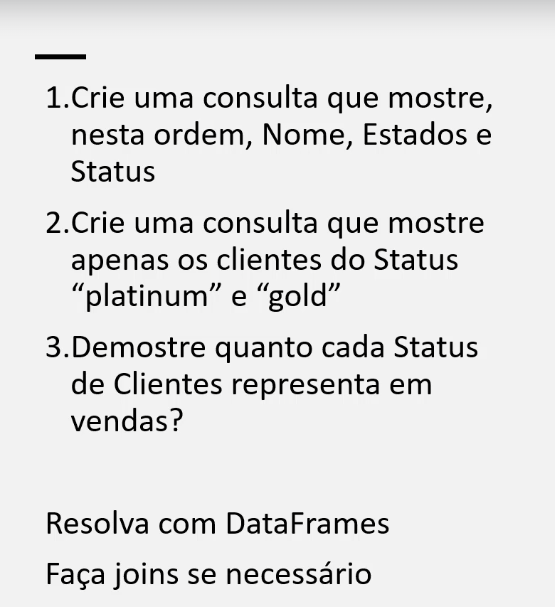

In [ ]:
!pip3 install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 18.1 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.2-py2.py3-none-any.whl size=281824025 sha256=17199b20e87595ca1a2eaee36fac3a1ff97623728e084d9f6f6a36b899347b37
  Stored in directory: /root/.cache/pip/wheels/6c/e3/9b/0525ce8a69478916513509d43693511463c6468db0de237c86
Successfully built pyspark


In [ ]:
from pyspark.sql import SparkSession

In [ ]:
spark = SparkSession.builder.appName('app_spark').getOrCreate()

In [ ]:
clientes = spark.read.format('parquet').load('dados_de_exemplo\Atividades\Clientes.parquet')
clientes.show()

+---------+--------------------+------+------+--------+
|ClienteID|             Cliente|Estado|Genero|  Status|
+---------+--------------------+------+------+--------+
|        1|Adelina Buenaventura|    RJ|     M|  Silver|
|        2|        Adelino Gago|    RJ|     M|  Silver|
|        3|     Adolfo Patrício|    PE|     M|  Silver|
|        4|    Adriana Guedelha|    RO|     F|Platinum|
|        5|       Adélio Lisboa|    SE|     M|  Silver|
|        6|       Adérito Bahía|    MA|     M|  Silver|
|        7|       Aida Dorneles|    RN|     F|  Silver|
|        8|   Alarico Quinterno|    AC|     M|  Silver|
|        9|    Alberto Cezimbra|    AM|     M|  Silver|
|       10|    Alberto Monsanto|    RN|     M|    Gold|
|       11|       Albino Canela|    AC|     M|  Silver|
|       12|     Alceste Varanda|    RR|     F|  Silver|
|       13|  Alcides Carvalhais|    RO|     M|  Silver|
|       14|        Aldo Martins|    GO|     M|  Silver|
|       15|   Alexandra Tabares|    MG|     F|  

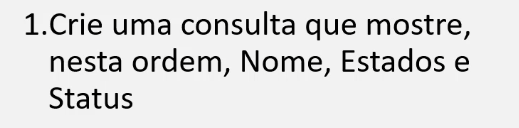

In [ ]:
clientes.select('Cliente', 'Estado', 'Status').orderBy('Cliente', 'Estado', 'Status').show()

+--------------------+------+--------+
|             Cliente|Estado|  Status|
+--------------------+------+--------+
|Adelina Buenaventura|    RJ|  Silver|
|        Adelino Gago|    RJ|  Silver|
|     Adolfo Patrício|    PE|  Silver|
|    Adriana Guedelha|    RO|Platinum|
|       Adélio Lisboa|    SE|  Silver|
|       Adérito Bahía|    MA|  Silver|
|       Aida Dorneles|    RN|  Silver|
|   Alarico Quinterno|    AC|  Silver|
|    Alberto Cezimbra|    AM|  Silver|
|    Alberto Monsanto|    RN|    Gold|
|       Albino Canela|    AC|  Silver|
|     Alceste Varanda|    RR|  Silver|
|  Alcides Carvalhais|    RO|  Silver|
|        Aldo Martins|    GO|  Silver|
|   Alexandra Tabares|    MG|  Silver|
|      Alfredo Cotrim|    SC|  Silver|
|     Almeno Figueira|    SC|  Silver|
|      Alvito Peralta|    AM|  Silver|
|     Amadeu Martinho|    RN|  Silver|
|      Amélia Estévez|    PE|  Silver|
+--------------------+------+--------+
only showing top 20 rows



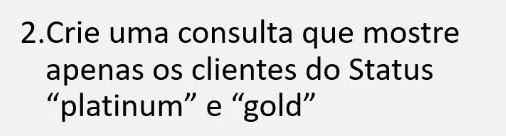

In [ ]:
clientes.filter((clientes.Status == 'Platinum') | (clientes.Status == 'Gold')).show()

+---------+-------------------+------+------+--------+
|ClienteID|            Cliente|Estado|Genero|  Status|
+---------+-------------------+------+------+--------+
|        4|   Adriana Guedelha|    RO|     F|Platinum|
|       10|   Alberto Monsanto|    RN|     M|    Gold|
|       28|      Anna Carvajal|    RS|     F|    Gold|
|       49|      Bento Quintão|    SP|     M|    Gold|
|       68|      Carminda Dias|    AM|     F|    Gold|
|       83|      Cláudio Jorge|    TO|     M|    Gold|
|      121|    Dionísio Saltão|    PR|     M|    Gold|
|      166|   Firmino Meireles|    AM|     M|    Gold|
|      170|      Flor Vilanova|    CE|     M|Platinum|
|      220|Honorina Villaverde|    PE|     F|    Gold|
|      230|    Ibijara Botelho|    RR|     F|Platinum|
|      237|  Iracema Rodríguez|    BA|     F|    Gold|
|      247|         Joana Ataí|    GO|     F|Platinum|
+---------+-------------------+------+------+--------+



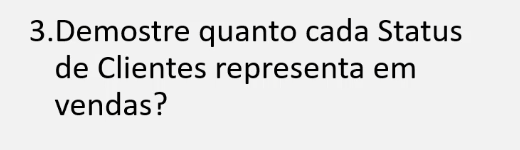

In [ ]:
vendas = spark.read.format('parquet').load('dados_de_exemplo\Atividades\Vendas.parquet')
vendas.show()

+--------+----------+---------+---------+--------+
|VendasID|VendedorID|ClienteID|     Data|   Total|
+--------+----------+---------+---------+--------+
|       1|         1|       91| 1/1/2019|  8053.6|
|       2|         6|      185| 1/1/2020|   150.4|
|       3|         7|       31| 2/1/2020|  6087.0|
|       4|         5|       31| 2/1/2019| 13828.6|
|       5|         5|       31| 3/1/2018|26096.66|
|       6|         5|       31| 4/1/2020| 18402.0|
|       7|         5|       31| 6/1/2019|  7524.2|
|       8|         5|      186| 6/1/2019| 12036.6|
|       9|         7|       91| 6/1/2020| 2804.75|
|      10|         2|      202| 6/1/2020|  8852.0|
|      11|         7|       58| 8/1/2019|16545.25|
|      12|         7|       58| 9/1/2018|11411.88|
|      13|         7|       58|10/1/2019| 15829.7|
|      14|         3|      249|12/1/2020| 6154.36|
|      15|         4|      249|12/1/2018| 3255.08|
|      16|         7|      192|13/1/2020| 2901.25|
|      17|         2|       79|

In [ ]:
venda_cliente = clientes.join(vendas, clientes.ClienteID == vendas.ClienteID, 'inner')
venda_cliente.show()

+---------+-------------------+------+------+------+--------+----------+---------+---------+--------+
|ClienteID|            Cliente|Estado|Genero|Status|VendasID|VendedorID|ClienteID|     Data|   Total|
+---------+-------------------+------+------+------+--------+----------+---------+---------+--------+
|       91|     Cosme Zambujal|    BA|     M|Silver|       1|         1|       91| 1/1/2019|  8053.6|
|      185|  Gertrudes Hidalgo|    PA|     F|Silver|       2|         6|      185| 1/1/2020|   150.4|
|       31|   Antão Corte-Real|    ES|     M|Silver|       3|         7|       31| 2/1/2020|  6087.0|
|       31|   Antão Corte-Real|    ES|     M|Silver|       4|         5|       31| 2/1/2019| 13828.6|
|       31|   Antão Corte-Real|    ES|     M|Silver|       5|         5|       31| 3/1/2018|26096.66|
|       31|   Antão Corte-Real|    ES|     M|Silver|       6|         5|       31| 4/1/2020| 18402.0|
|       31|   Antão Corte-Real|    ES|     M|Silver|       7|         5|       31|

In [ ]:
from pyspark.sql.functions import countDistinct, sum, col

In [ ]:
venda_cliente.groupBy('Status').agg(countDistinct('VendasID')).show()

+--------+---------------+
|  Status|count(VendasID)|
+--------+---------------+
|Platinum|              2|
|  Silver|            395|
|    Gold|              3|
+--------+---------------+



In [ ]:
vendas_por_status = venda_cliente.groupBy('Status').agg(sum('Total').alias('total_vendas'))
vendas_por_status.show()

+--------+------------------+
|  Status|      total_vendas|
+--------+------------------+
|Platinum|          12584.68|
|  Silver|        3014291.36|
|    Gold|27286.690000000002|
+--------+------------------+



In [ ]:
vendas_por_status.withColumn('percentual_vendas', vendas_por_status.total_vendas / vendas_por_status.select(sum('total_vendas')).collect()[0][0] * 100).show()

+--------+------------------+------------------+
|  Status|      total_vendas| percentual_vendas|
+--------+------------------+------------------+
|Platinum|          12584.68|0.4120500809071166|
|  Silver|        3014291.36| 98.69452371976263|
|    Gold|27286.690000000002|  0.89342619933025|
+--------+------------------+------------------+

